In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [3]:
import csv
df = pd.read_csv('Reviews.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip', encoding='utf-8', engine='python')
print(df.shape)
df.head(500)
print(df.shape)

(65331, 10)
(65331, 10)


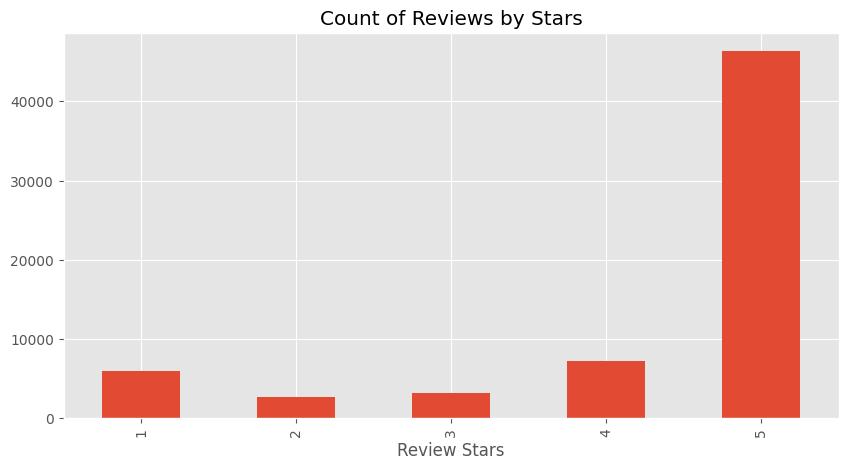

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['Text'][50]
print(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['AWESOME', '!', '!', '!', 'such', 'a', 'yummy', 'flavor', 'I', 'got']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('AWESOME', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('yummy', 'JJ'),
 ('flavor', 'NN'),
 ('I', 'PRP'),
 ('got', 'VBD')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  AWESOME/RB
  !/.
  !/.
  !/.
  such/PDT
  a/DT
  yummy/JJ
  flavor/NN
  I/PRP
  got/VBD
  it/PRP
  as/IN
  a/DT
  healthy/JJ
  alternative/NN
  to/TO
  the/DT
  desserts/NNS
  we/PRP
  normally/RB
  eat/VBP
  and/CC
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  that/IN
  I/PRP
  did/VBD
  there/EX
  are/VBP
  so/RB
  many/JJ
  things/NNS
  you/PRP
  can/MD
  do/VB
  with/IN
  (PERSON Jello/NNP)
  desserts/NNS
  and/CC
  still/RB
  have/VB
  them/PRP
  taste/VB
  good/JJ
  and/CC
  be/VB
  good/JJ
  for/IN
  you/PRP
  ./.
  I/PRP
  will/MD
  definitentally/RB
  be/VB
  purchasing/VBG
  this/DT
  product/NN
  again/RB
  the/DT
  flavor/NN
  was/VBD
  so/RB
  wonderful/JJ
  ./.)


## VADER Approach


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [13]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/65331 [00:00<?, ?it/s]

In [35]:
res

{109936: {'vader_neg': 0.0,
  'vader_neu': 0.633,
  'vader_pos': 0.367,
  'vader_compound': 0.9812,
  'roberta_neg': np.float32(0.0015890409),
  'roberta_neu': np.float32(0.010622691),
  'roberta_pos': np.float32(0.98778826)},
 102453: {'vader_neg': 0.0,
  'vader_neu': 0.791,
  'vader_pos': 0.209,
  'vader_compound': 0.7003,
  'roberta_neg': np.float32(0.0039548236),
  'roberta_neu': np.float32(0.06307476),
  'roberta_pos': np.float32(0.93297046)},
 110437: {'vader_neg': 0.0,
  'vader_neu': 0.627,
  'vader_pos': 0.373,
  'vader_compound': 0.8934,
  'roberta_neg': np.float32(0.0026050534),
  'roberta_neu': np.float32(0.017822806),
  'roberta_pos': np.float32(0.9795721)},
 240016: {'vader_neg': 0.0,
  'vader_neu': 0.71,
  'vader_pos': 0.29,
  'vader_compound': 0.9714,
  'roberta_neg': np.float32(0.0014423537),
  'roberta_neu': np.float32(0.007543299),
  'roberta_pos': np.float32(0.9910143)},
 76127: {'vader_neg': 0.0,
  'vader_neu': 0.741,
  'vader_pos': 0.259,
  'vader_compound': 0.8087

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [15]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


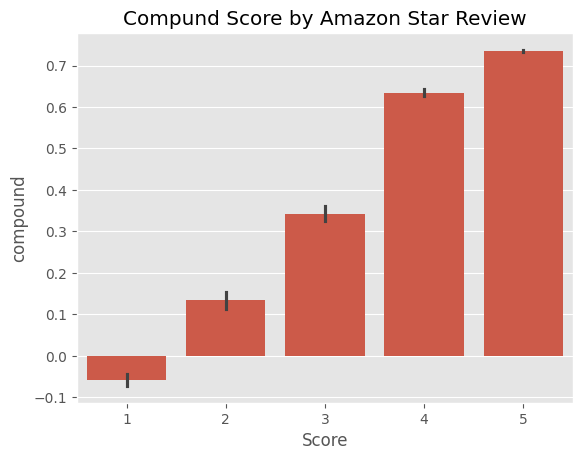

In [16]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

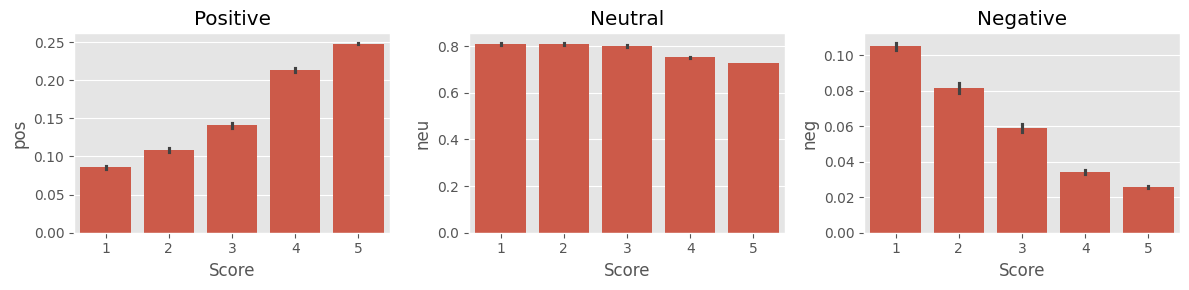

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Approach


In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [20]:
print(example)
sia.polarity_scores(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [21]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0016300862), 'roberta_neu': np.float32(0.0053900606), 'roberta_pos': np.float32(0.9929798)}


In [22]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [23]:
df_sampled = df.sample(n=5000, random_state=42)
res = {}
for row in tqdm(df_sampled.itertuples(), total=len(df_sampled)):
    try:
        text = row.Text
        myid = row.Id

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{k}": v for k, v in vader_result.items()}

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}

        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [24]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [25]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

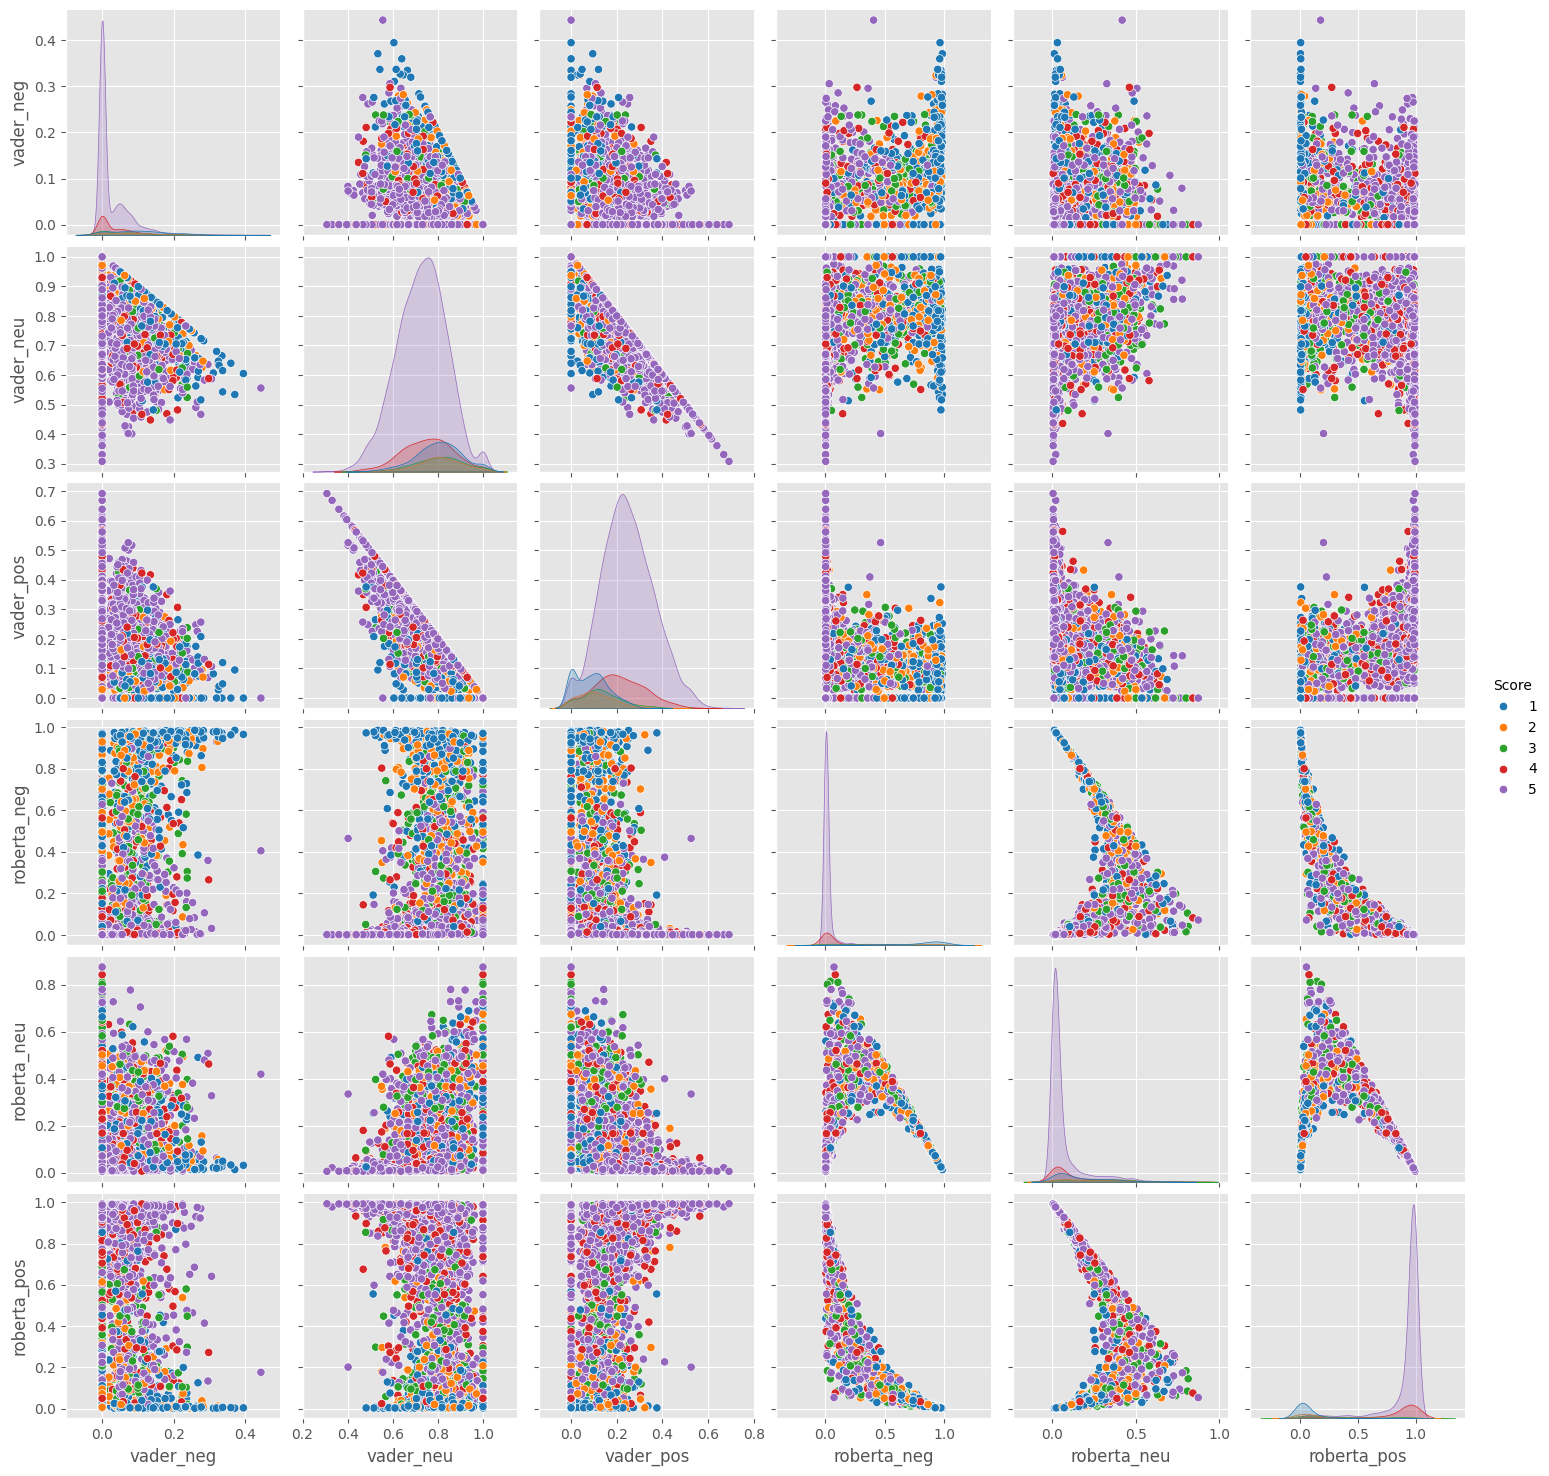

In [26]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [27]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'This has been my favorite tea for several years. The purple boxes list artificial flavoring instead of natural as the third ingredient. It now tastes like I remember kool aid tasting as a kid. Amazon customer service was great in refunding.'

In [28]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"I'm a huge chocolate/ banana fan. But these suck. The banana is WAY too sweet? Almost sour like. Yuck."

In [29]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

"I didn't like this product all that well. It was really tangy and hurt my stomach. I was more than a little surprised when my picky eater 9 yr olds ate 17 sticks in one sitting between them. I guess that's why they are labeled for KIDS."

In [30]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'Ignore any negative comments.  I have never given this to anyone who did not love it.'

## Transformers Pipeline

In [31]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [32]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [33]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [34]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [36]:
sent_pipeline('This smoothie is so good!')

[{'label': 'POSITIVE', 'score': 0.9998698234558105}]

In [39]:
sent_pipeline('Never buy this smoothie if you like good smoothies')

[{'label': 'POSITIVE', 'score': 0.9534277319908142}]